In [2]:
import os
import subprocess
FNULL = open(os.devnull, 'w')

# Run a single script per configuration so CuDA environment is reset
args_names = [
    'batch-size',
    'num-layers',
    'model-type',
    'autocast'
]

def run_script(args):

    main_command = [
        'python3',
        'get_mem_alloc.py',
    ]

    options = {}
    options.update(dict(zip(args_names, args)))
    

    whole_command = main_command
    for k, v in options.items():
        whole_command.append('--' + k)
        whole_command.append(v)

    print(whole_command)
    process = subprocess.Popen(args=whole_command, stdout=FNULL)
    return process

In [32]:
import numpy as np
autocast = 'true'

for nl in [18,34]:
    for bs in np.arange(1, 50)*8:
        process = run_script([str(bs), str(nl), 'resnet', autocast])
        process.wait()

for nl in [50, 101, 152]:
    for bs in np.arange(1, 17)*8:
        process = run_script([str(bs), str(nl), 'resnet', autocast])
        process.wait()

In [43]:
import pickle as pkl
with open("mem_stats.pkl", 'rb') as f:
    mem_stats = pkl.load(f)

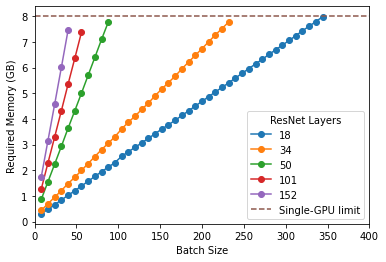

In [44]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(8,400,8)
# for nl in [18, 34, 50, 101, 152]:
for nl in [18,34,50,101,152]:
    y = []
    for bs in x:
        m = mem_stats['resnet', nl, bs, False]
        if m is None or m > 8*1e9:
            break
        else:
            y.append(m/1e9)
    plt.plot(x[:len(y)],y,label=nl,marker='o')
plt.plot([0,400], [8,8],linestyle='--', label='Single-GPU limit')
plt.xlim(0, 400)
plt.legend(title="ResNet Layers")
plt.xlabel('Batch Size')
plt.ylabel('Required Memory (GB)')
plt.savefig("figures/resnet_memory.pdf")

In [15]:

r50 = torchvision.models.resnet50()
r101 = torchvision.models.resnet101()
l = list(r50.named_modules())
k = list(r101.named_modules())
for i in range(100):
    print(l[i][0].ljust(20), k[i][0])

                     
conv1                conv1
bn1                  bn1
relu                 relu
maxpool              maxpool
layer1               layer1
layer1.0             layer1.0
layer1.0.conv1       layer1.0.conv1
layer1.0.bn1         layer1.0.bn1
layer1.0.conv2       layer1.0.conv2
layer1.0.bn2         layer1.0.bn2
layer1.0.conv3       layer1.0.conv3
layer1.0.bn3         layer1.0.bn3
layer1.0.relu        layer1.0.relu
layer1.0.downsample  layer1.0.downsample
layer1.0.downsample.0 layer1.0.downsample.0
layer1.0.downsample.1 layer1.0.downsample.1
layer1.1             layer1.1
layer1.1.conv1       layer1.1.conv1
layer1.1.bn1         layer1.1.bn1
layer1.1.conv2       layer1.1.conv2
layer1.1.bn2         layer1.1.bn2
layer1.1.conv3       layer1.1.conv3
layer1.1.bn3         layer1.1.bn3
layer1.1.relu        layer1.1.relu
layer1.2             layer1.2
layer1.2.conv1       layer1.2.conv1
layer1.2.bn1         layer1.2.bn1
layer1.2.conv2       layer1.2.conv2
layer1.2.bn2         layer1.